In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pickle

In [2]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Outcome

<Axes: >

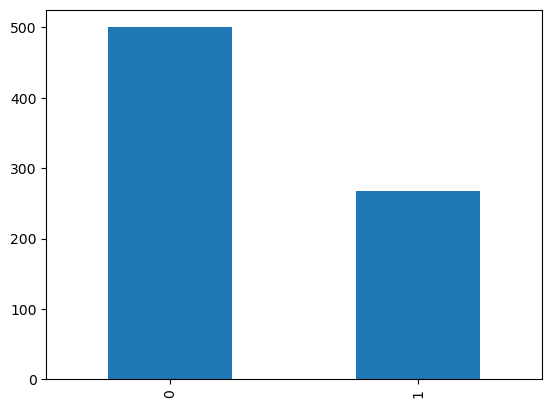

In [6]:
diabetes['Outcome'].value_counts().plot(kind='bar')

<Axes: >

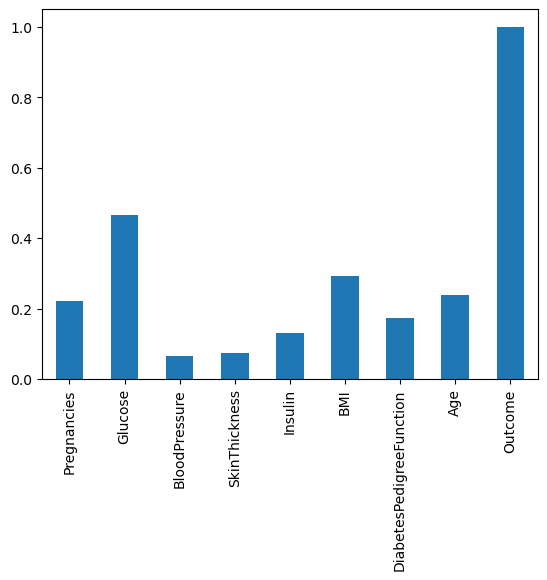

In [7]:
diabetes.corr()['Outcome'].plot(kind = 'bar')

In [26]:
diabetes.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


### Pregnancies

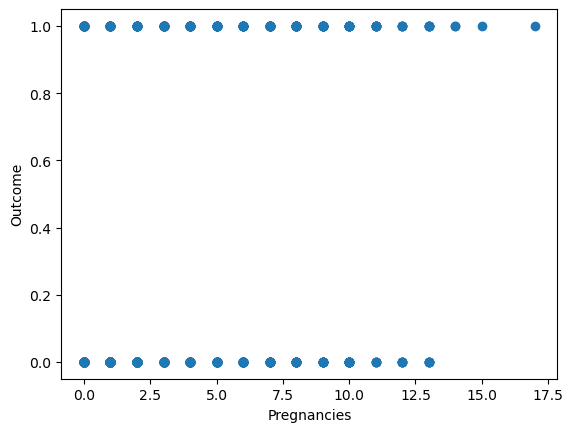

In [8]:
plt.scatter(diabetes['Pregnancies'], diabetes['Outcome'])
plt.xlabel('Pregnancies')
plt.ylabel('Outcome')
plt.show()

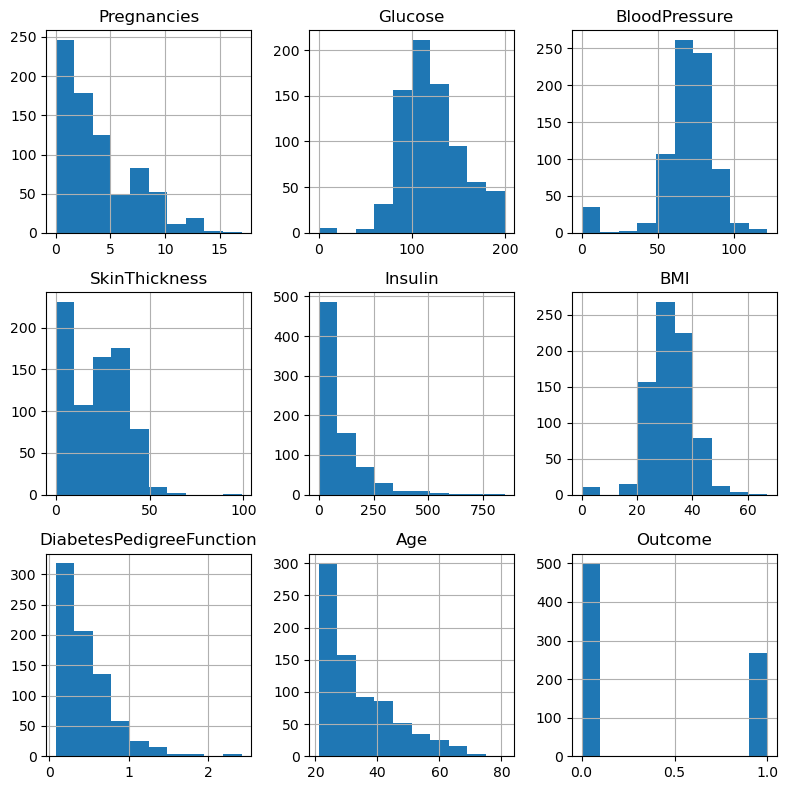

In [9]:
diabetes.hist(grid=True, figsize=(8,8))
plt.tight_layout()

### Train test split

In [10]:
x= diabetes.drop(columns=['Outcome'])
y= diabetes['Outcome']

In [11]:
scaler = StandardScaler()

In [12]:
x = scaler.fit_transform(x)

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=10)

In [14]:
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7
0,-0.844885,1.849832,-3.572597,-1.288212,-0.692891,1.435129,-0.573449,0.660206
1,1.233880,1.067404,-0.367337,0.342717,3.605143,0.254780,0.214802,1.085644
2,0.936914,-0.215779,-0.160546,-1.288212,-0.692891,0.102477,-0.645932,0.745293
3,-0.844885,-0.372265,-0.574128,-0.159107,0.314325,-0.443275,-0.763716,-0.956462
4,-0.844885,0.942215,-0.470732,-1.288212,-0.692891,-0.747882,-0.884521,-0.956462


In [15]:
y_train.head()

332    1
111    1
64     1
742    0
101    0
Name: Outcome, dtype: int64

In [16]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(614, 8) (614,) (154, 8) (154,)


### Training model

In [17]:
log = LogisticRegression()

In [18]:
log.fit(x_train,y_train)

LogisticRegression()

In [19]:
y_train_pred = log.predict(x_train)

In [20]:
acc = accuracy_score(y_train_pred,y_train)

In [24]:
print('accuracy train:',acc)

accuracy train: 0.7638436482084691


In [22]:
y_test_pred = log.predict(x_test)

In [25]:
print('accuracy test:',accuracy_score(y_test_pred,y_test))

accuracy test: 0.8116883116883117


### Exporting model

In [30]:
pickle.dump(log,open('diabetes.pkl','wb'))